### simulating donation game in prisoner's dillema

https://en.wikipedia.org/wiki/Prisoner%27s_dilemma

In [241]:
import pandas as pd
import numpy as np
import seaborn as sn;sn.set()

In [242]:
class indiv:
    def __init__(self,age,K,b,c,h):
        self.age=age
        self.K = K
        self.b = b
        self.c = c
        self.h = h
    def coop(self,other):
        self.K = self.K - self.c
        other.K = other.K + self.b
        self.age +=1
    def defect(self,other):
        self.K = self.K
        self.age +=1
    def replicate(self):
        return(indiv(0,self.K,self.b,self.c,self.h))

In [243]:
def select_interaction(p1,p2):
    P = [p1*p2,p1*(1-p2),(1-p1)*p2,(1-p1)*(1-p2)]
    choice = np.random.choice(range(len(P)),replace=False,p=P)
    return(choice)

In [244]:
from matplotlib import pyplot as plt

In [245]:
def distant_dep_coop(i1,j1,i2,j2,h1,h2):
    dist = np.sqrt((i1-i2)**2+(j1-j2)**2)
    z1=1/(1+np.exp(-h1*dist))
    z2=1/(1+np.exp(-h2*dist))
    return([1-z1,1-z2])

In [271]:
def interact(x):
    i1 = np.random.randint(0,x.shape[0])
    j1 = np.random.randint(0,x.shape[0])
    
    s=np.random.choice([0,1,-1],2)
    
    i2 = i1+s[0]
    j2 = j1+s[1]
    
    if i2 in range(x.shape[0]) and j2 in range(x.shape[1]):
        x1 = x[i1,j1]
        x2 = x[i2,j2]
        [p1,p2] = distant_dep_coop(i1,j1,i2,j2,x1.h,x2.h)
        interaction = select_interaction(p1,p2)
    
        if interaction == 0:
            x1.coop(x2); x2.coop(x1) 
        elif interaction == 1:
            x1.coop(x2); x2.defect(x1)
        elif interaction == 2:
            x1.defect(x2); x2.coop(x1)
        else:
            x1.defect(x2); x2.defect(x1)
    

In [317]:
def get_k_mat(x):
    n = x.shape[0]
    k_mat = np.array([m.K for m in y.flatten()]).reshape(n,n) 
    return(k_mat)

In [313]:
K0=10; b = 1; c = 0.5; n = 100; n_iter=10000; h1=1;h2=20; frac_h1 = 0.5;

In [314]:
N = n**2
N1 = int(frac_h1*N); N2 = N - N1
x1 = [indiv(0,K0,b,c,h1) for i in range(N1)]
x2 = [indiv(0,K0,b,c,h2) for i in range(N2)]
x = np.array(x1+x2)
y = x.reshape(n,n)

In [315]:
for i in range(n_iter):
    interact(y)
k_mat = get_k_mat(y)

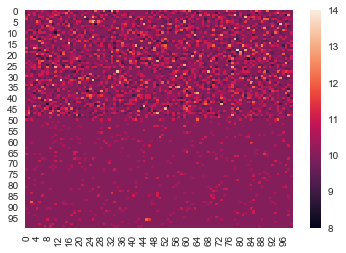

In [316]:
sn.heatmap(k_mat)

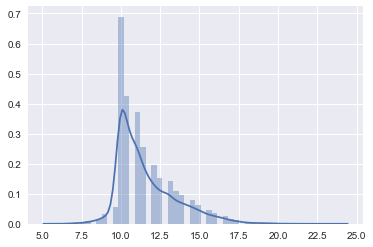

In [304]:
sn.distplot(k_mat.flatten())

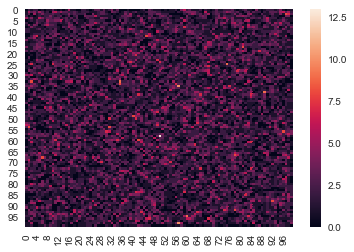

In [319]:
sn.heatmap(np.array([m.age for m in y.flatten()]).reshape(n,n))